In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [186]:
from sklearn.linear_model import LinearRegression

In [117]:
connection = sqlite3.connect('sql-murder-mystery.db')
cur = connection.cursor()
query = """
SELECT type, COUNT (type), date FROM crime_scene_report 
WHERE date between 20170101 and 20171231
AND city = 'SQL City'
GROUP BY type

UNION ALL 

SELECT type, COUNT (type), date FROM crime_scene_report
WHERE date between 20180101 and 20181231
AND city = 'SQL City'
GROUP BY type
"""
crime_stats=pd.read_sql_query(query, connection)
crime_stats.to_csv('crime_stats.csv', index = False)
crime_stats_csv=pd.read_csv('crime_stats.csv')
crime_stats_csv

,type,COUNT (type),date
0,arson,1,20170820
1,robbery,1,20171110
2,theft,1,20170712
3,assault,2,20180115
4,bribery,1,20180103
5,murder,3,20180215


In [143]:
all2017crimerate = (1/13375) * 100000
bribery2018 = (1/13375) * 100000
assault2018 = (2/13375) * 100000
murder2018 = (3/13375) * 100000
violentcrimerate2017 = (1/13375) * 100000
violentcrimerate2018 = (5/13375) * 100000
print(violentcrimerate2017, violentcrimerate2018 *4, murder2018 * 4)

7.476635514018692 149.53271028037383 89.7196261682243


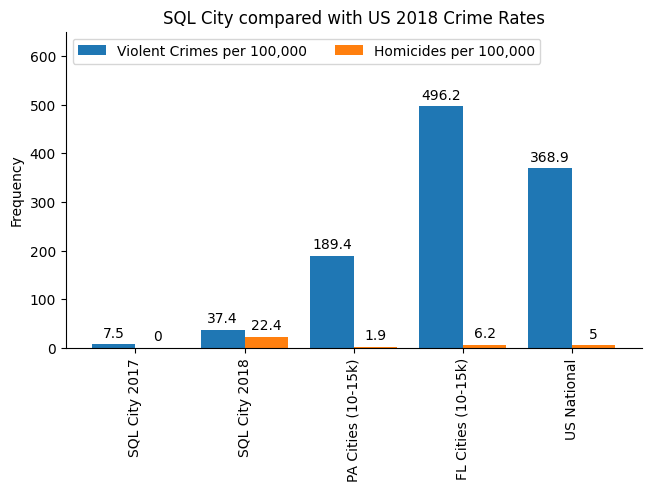

In [22]:
cities = ("SQL City 2017", "SQL City 2018", "PA Cities (10-15k)", "FL Cities (10-15k)", "US National")
crimestats = {
    'Violent Crimes per 100,000': (7.5, 37.4, 189.4 , 496.2, 368.9),
    'Homicides per 100,000': (0, 22.4, 1.9 , 6.2, 5)}

x = np.arange(len(cities))
width = 0.4 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in crimestats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Frequency')
ax.set_title('SQL City compared with US 2018 Crime Rates')
ax.set_xticks(x + width/2, cities)
ax.legend(loc = 'upper left', ncols=2)
ax.set_ylim(0, 650)
plt.xticks(rotation=90)
sns.despine(right = True)
plt.savefig("crimerates.png")
plt.show()



In [ ]:
connection = sqlite3.connect('sql-murder-mystery.db')
cur = connection.cursor()
query = """
SELECT 
    type, COUNT (type), date 
FROM crime_scene_report 
WHERE date between 20170101 and 20171231
AND city = 'SQL City'
GROUP BY type

UNION ALL 

SELECT 
    type, COUNT (type), date 
FROM crime_scene_report
WHERE date between 20180101 and 20181231
AND city = 'SQL City'
GROUP BY type
"""

In [172]:
query = 'SELECT drivers_license.age FROM drivers_license'
citizens=pd.read_sql_query(query, connection)
citizens.to_csv('citizens.csv', index = False)
citcsv=pd.read_csv('citizens.csv')
citcsv

,age
0,72
1,63
2,62
3,43
4,18
...,...
10002,19
10003,71
10004,67
10005,49


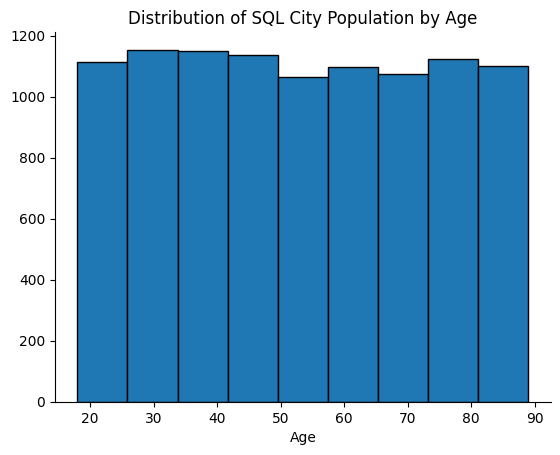

Bin 1 range: 18.0 - 25.88888888888889
Bin 2 range: 25.88888888888889 - 33.77777777777778
Bin 3 range: 33.77777777777778 - 41.66666666666667
Bin 4 range: 41.66666666666667 - 49.55555555555556
Bin 5 range: 49.55555555555556 - 57.44444444444444
Bin 6 range: 57.44444444444444 - 65.33333333333334
Bin 7 range: 65.33333333333334 - 73.22222222222223
Bin 8 range: 73.22222222222223 - 81.11111111111111
Bin 9 range: 81.11111111111111 - 89.0
Frequencies:  [1113 1154 1149 1137 1064 1096 1073 1122 1099]


In [174]:

data = citcsv['age']

frequencies, bin_edges = np.histogram(data, bins=9)

plt.bar(bin_edges[:-1], frequencies, width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.xlabel('Age')
plt.title('Distribution of SQL City Population by Age')
sns.despine(right = True)

plt.show()

for i in range(len(bin_edges) - 1):
    print(f'Bin {i+1} range: {bin_edges[i]} - {bin_edges[i+1]}')

print("Frequencies: ", frequencies)


In [9]:
cursor.execute('Select COUNT(name) FROM person')
results = cursor.fetchall()
for row in results:
    print(row)

(10011,)


In [22]:
df=pd.read_csv('us age dist.csv')
agedist = df.iloc[:, 0:3]
agedist

,Age,Male%,Female%
0,0,0.56%,0.54%
1,1,0.55%,0.53%
2,2,0.57%,0.54%
3,3,0.57%,0.55%
4,4,0.59%,0.56%
...,...,...,...
96,96,0.01%,0.03%
97,97,0.01%,0.02%
98,98,0.01%,0.02%
99,99,0.00%,0.01%


In [32]:

agedist['Male%'] = agedist['Male%'].astype(float)
agedist['Female%'] = agedist['Female%'].astype(float)
print(agedist.dtypes)

ValueError: could not convert string to float: '0.56%'

In [29]:
col1young = df['Male%'].iloc[0:18].sum()
col2young = df['Female%'].iloc[0:18].sum()
col1old = df['Male%'].iloc[90:100].sum()
col2old = df['Female%'].iloc[90:100].sum()
totalyoung = col1young + col2young
totalold = col1old + col2old

print(col1young)

ValueError: could not convert string to float: '0.56%'

In [33]:
odds_under_18 = (0.783) ** 10000
odds_over_90 = (0.9923) ** 10000

print("Odds of no person under 18: {:.2e}".format(odds_under_18))
print("Odds of no person over 90: {:.2e}".format(odds_over_90))

Odds of no person under 18: 0.00e+00
Odds of no person over 90: 2.69e-34


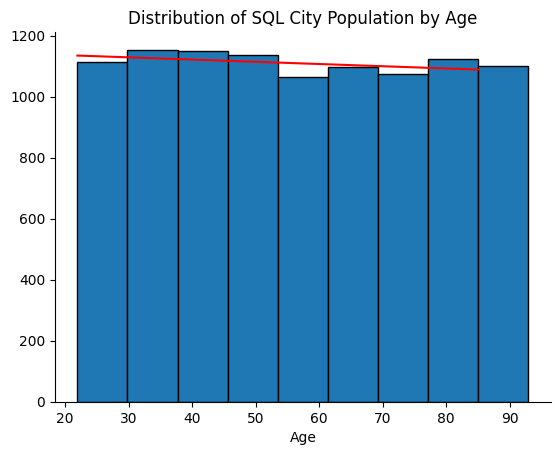

Estimated frequency for age 0-8: 1147.9681142410016
Estimated frequency for age 9-17: 1138.128325508607
Estimated frequency for age 90-98: 1082.733959311424


In [187]:

frequencies = np.array([1113, 1154, 1149, 1137, 1064, 1096, 1073, 1122, 1099])
bin_ranges = np.array([
    18.0, 25.88888888888889, 33.77777777777778, 41.66666666666667, 49.55555555555556,
    57.44444444444444, 65.33333333333334, 73.22222222222223, 81.11111111111111, 89.0
])


bin_centers = (bin_ranges[:-1] + bin_ranges[1:]) / 2

X = bin_centers.reshape(-1, 1)
y = frequencies.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.bar(bin_centers, frequencies, width=np.diff(bin_ranges), edgecolor='black', align='edge')

plt.plot(bin_centers, y_pred, color='red')

plt.xlabel('Age')
plt.title('Distribution of SQL City Population by Age')
sns.despine(right=True)
plt.savefig("act_pop.png")
plt.show()


X_new = np.array([8/2, 9+17/2, (90+97)/2]).reshape(-1, 1)  
y_new = model.predict(X_new)

print(f"Estimated frequency for age 0-8: {y_new[0][0]}")
print(f"Estimated frequency for age 9-17: {y_new[1][0]}")
print(f"Estimated frequency for age 90-98: {y_new[2][0]}")


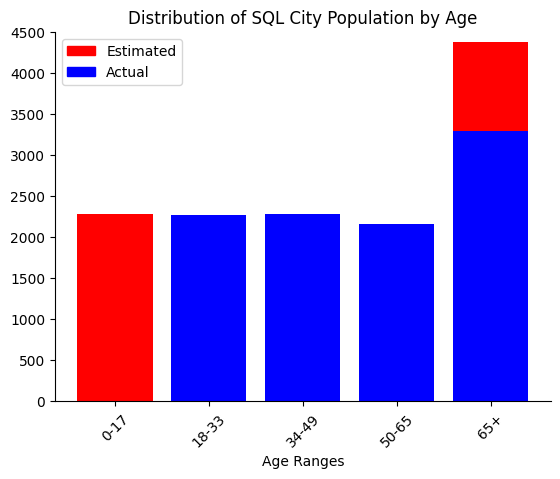

New Population: 13375


In [176]:


base_frequencies = np.array([0, 1113+1154, 1149+1137, 1064+1096, 1073+1122+1099])
to_stack_frequencies = np.array([1148+1138, 0, 0, 0, 1082])
new_pop= sum(base_frequencies) + sum(to_stack_frequencies)

age_ranges = np.array(["0-17", "18-33","34-49", "50-65", "65+"])

plt.xlabel('Age Ranges')
plt.xticks(rotation=45)
plt.title('Distribution of SQL City Population by Age')

base_bars = plt.bar(age_ranges, base_frequencies, color='blue')

stacked_bars = plt.bar(age_ranges, to_stack_frequencies, bottom=base_frequencies, color='red')

red_patch = mpatches.Patch(color='red', label='Estimated')
blue_patch = mpatches.Patch(color='blue', label='Actual')
plt.legend(handles=[red_patch, blue_patch])
plt.ylim(0, 4500)

sns.despine(right=True)
plt.savefig("est_pop.png")
plt.show()

print("New Population:", new_pop)


In [39]:
query = """
WITH 
    total_counts AS (
        SELECT 
            CAST(COUNT(CASE WHEN age >= 18 AND age < 67 THEN 1 END) AS FLOAT) AS total_count_18_to_66,
            CAST(COUNT(CASE WHEN age >= 67 THEN 1 END) AS FLOAT) AS total_count_67_up 
        FROM person
        LEFT JOIN drivers_license on person.license_id = drivers_license.id
        LEFT JOIN income on income.ssn = person.ssn
    ), 
    null_income_counts AS (
        SELECT 
            CAST(COUNT(CASE WHEN age >= 18 AND age < 67 THEN 1 END) AS FLOAT) AS null_income_count_18_to_66,
            CAST(COUNT(CASE WHEN age >= 67 THEN 1 END) AS FLOAT) AS null_income_count_67_up 
        FROM person
        LEFT JOIN drivers_license on person.license_id = drivers_license.id
        LEFT JOIN income on income.ssn = person.ssn
        WHERE annual_income IS NULL
    )
SELECT 
    null_income_count_18_to_66 / total_count_18_to_66 AS ratio_18_to_66,
    null_income_count_67_up / total_count_67_up AS ratio_67_up
FROM total_counts, null_income_counts

"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)



(0.25503943908851884, 0.23607594936708862)


In [44]:
query = """ 
SELECT  
    ROUND(AVG(annual_income)) AS Average_Income  
FROM income """

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    
    
Average_Income	Median_Income
53258	        50800

(53258.0,)


In [179]:
query = """ 
WITH lowinc AS (
  SELECT annual_income
  FROM income
  ORDER BY annual_income ASC
  LIMIT 751
),
highinc AS (
  SELECT annual_income
  FROM income
  ORDER BY annual_income DESC
  LIMIT 751
)
SELECT 
    CAST(SUM(highinc.annual_income)AS FLOAT) / CAST(SUM(lowinc.annual_income)AS FLOAT) AS Ratio
FROM highinc, lowinc; """

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print("Decile Ratio:", row)
    
    

Decile Ratio: (8.155485534230879,)


In [98]:
def gini(array):
    array = np.abs(array)
    array = array.astype(float) 
    array += 0.0000001 
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1) 
    n = array.shape[0] 
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

cur.execute("SELECT annual_income FROM income")
rows = cur.fetchall()

incomes = np.array([row[0] for row in rows])

gini_coefficient = gini(incomes)

print(f"Gini coefficient: {gini_coefficient}")


Gini coefficient: 0.30323969451537797


In [58]:
query = """
SELECT 
    COUNT(CASE WHEN gender = 'male' THEN 1 END) / 10011.0 as male_ratio,
    COUNT(CASE WHEN gender = 'female' THEN 1 END) / 10011.0 as female_ratio
FROM drivers_license
"""

cur.execute(query)
result = cur.fetchone()

print(f"Male ratio: {result[0]}")
print(f"Female ratio: {result[1]}")

Male ratio: 0.4937568674458096
Female ratio: 0.5058435720707222


In [121]:
query = """
SELECT 
    COUNT(CASE WHEN date BETWEEN 20170101 AND 20171231 THEN 1 END),
    COUNT(CASE WHEN date BETWEEN 20180101 AND 20181231 THEN 1 END)
FROM facebook_event_checkin
"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    


(14986, 5025)


In [188]:
query = """
    SELECT event_name, date, COUNT(person_id) AS count_2017 
    FROM facebook_event_checkin 
    WHERE date BETWEEN '20170101' AND '20171231' 
    GROUP BY event_name, date
    
    UNION ALL

    SELECT event_name, date, COUNT(person_id) AS count_2018 
    FROM facebook_event_checkin 
    WHERE date BETWEEN '20180101' AND '20181231' 
    GROUP BY event_name, date;

"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    


('\n', 20170102, 1)
('\n', 20170104, 2)
('\n', 20170105, 1)
('\n', 20170106, 1)
('\n', 20170108, 1)
('\n', 20170109, 1)
('\n', 20170112, 1)
('\n', 20170114, 1)
('\n', 20170117, 1)
('\n', 20170120, 1)
('\n', 20170121, 1)
('\n', 20170122, 2)
('\n', 20170123, 1)
('\n', 20170124, 1)
('\n', 20170126, 2)
('\n', 20170127, 1)
('\n', 20170128, 1)
('\n', 20170129, 1)
('\n', 20170131, 1)
('\n', 20170203, 1)
('\n', 20170210, 2)
('\n', 20170211, 1)
('\n', 20170214, 1)
('\n', 20170216, 1)
('\n', 20170220, 1)
('\n', 20170221, 1)
('\n', 20170224, 1)
('\n', 20170226, 1)
('\n', 20170228, 1)
('\n', 20170301, 1)
('\n', 20170302, 2)
('\n', 20170303, 1)
('\n', 20170309, 1)
('\n', 20170311, 1)
('\n', 20170313, 1)
('\n', 20170318, 1)
('\n', 20170320, 1)
('\n', 20170324, 2)
('\n', 20170325, 1)
('\n', 20170327, 3)
('\n', 20170328, 2)
('\n', 20170330, 1)
('\n', 20170402, 1)
('\n', 20170403, 1)
('\n', 20170405, 2)
('\n', 20170409, 1)
('\n', 20170414, 1)
('\n', 20170416, 2)
('\n', 20170417, 1)
('\n', 20170420, 2)


In [136]:
query = """
SELECT
    COUNT (DISTINCT id),
    COUNT(CASE WHEN check_in_date BETWEEN 20170101 AND 20171231 THEN 1 END),
    COUNT(CASE WHEN check_in_date BETWEEN 20180101 AND 20181231 THEN 1 END)
FROM get_fit_now_check_in
RIGHT JOIN get_fit_now_member ON get_fit_now_member.id = get_fit_now_check_in.membership_id
"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    


(184, 2031, 672)


In [70]:
query = """
SELECT 
    COUNT (membership_id)
FROM get_fit_now_check_in
GROUP BY membership_id
ORDER BY COUNT (membership_id) desc


"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    


(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(27,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(26,)
(25,)
(25,)
(25,)
(25,)
(24,)
(24,)
(24,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(22,)
(22,)
(22,)
(22,)
(22,)
(22,)
(21,)
(21,)
(21,)
(21,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(18,)
(18,)
(18,)
(18,)
(18,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(17,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(15,)
(15,)
(15,)
(15,)
(15,)
(14,)
(14,)
(14,)
(14,)
(14,)
(13,)
(13,)
(13,)
(13,)
(12,)
(12,)
(12,)
(12,)
(12,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(6,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(2,)


In [82]:
data = {
    ' ': ['SQL City','USA'],
    'GDP per Capita': [53258, 62823],
    'Gini Coefficient': [0.30, 0.434],
    'Decile Ratio' : [8.16, 12.6],
    'Unemployment (%)': [25.5, 3.9],
    'Never-Beneficiary (%)': [23.6, 4]
    
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

          GDP per Capita  Gini Coefficient  Decile Ratio  Unemployment (%)  Never-Beneficiary (%)
SQL City           53258             0.300          8.16              25.5                   23.6
     USA           62823             0.434         12.60               3.9                    4.0


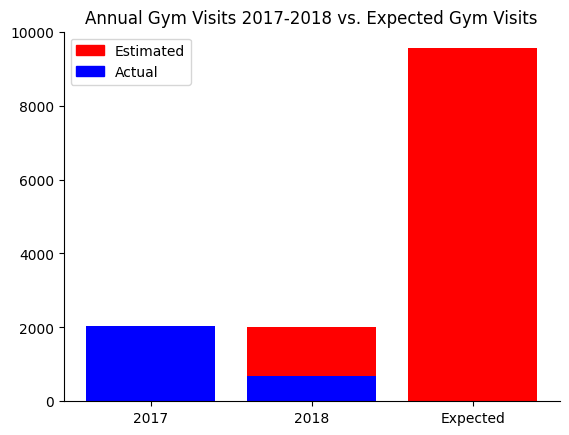

In [140]:
gymmembers = 184
visits = 2031, 672, 2018, 9568
Labels: [2017, 2018, "Expected Annual Visits"]
    


base_frequencies = np.array([2031, 672, 0])
to_stack_frequencies = np.array([0, 2018-672, 9568])

age_ranges = np.array(["2017", "2018", "Expected"])

plt.title('Annual Gym Visits 2017-2018 vs. Expected Gym Visits')

base_bars = plt.bar(age_ranges, base_frequencies, color='blue')

stacked_bars = plt.bar(age_ranges, to_stack_frequencies, bottom=base_frequencies, color='red')

red_patch = mpatches.Patch(color='red', label='Estimated')
blue_patch = mpatches.Patch(color='blue', label='Actual')
plt.legend(handles=[red_patch, blue_patch])
plt.ylim(0, 10000)

sns.despine(right=True)
plt.savefig("est_gym.png")
plt.show()



In [133]:
query = """
    SELECT 
        COUNT(DISTINCT event_name || date) AS unique_events
    FROM facebook_event_checkin 
    WHERE date BETWEEN 20170101 AND 20171231
    
    UNION ALL

    SELECT 
        COUNT(DISTINCT event_name || date) AS unique_events
    FROM facebook_event_checkin 
    WHERE date BETWEEN 20180101 AND 20181231


"""

cur.execute(query)
rows = cur.fetchall()
for row in rows:
    print(row)
    



(14584,)
(4885,)


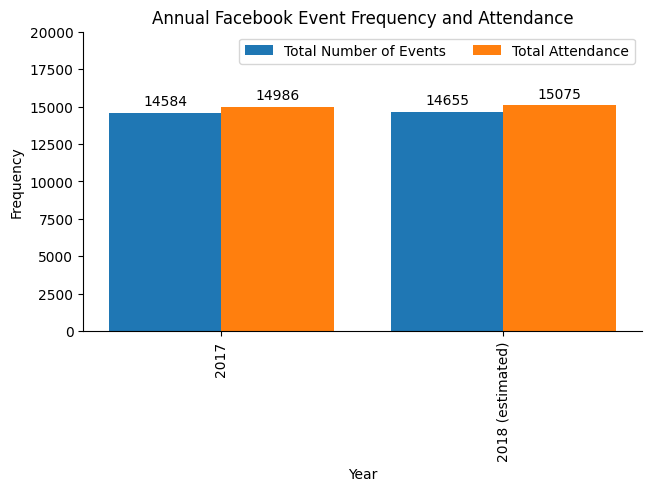

In [194]:
years = (2017, "2018 (estimated)")
eventstats = {
    'Total Number of Events': (14584, 4885*3),
    'Total Attendance': (14986, 5025*3)}

x = np.arange(len(years))
width = 0.4 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in eventstats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Annual Facebook Event Frequency and Attendance')
ax.set_xticks(x + width/2, years)
ax.legend(loc = 'upper right', ncols=2)
ax.set_ylim(0, 20000)
plt.xticks(rotation=90)
sns.despine(right = True)
plt.savefig("eventrates.png")
plt.show()




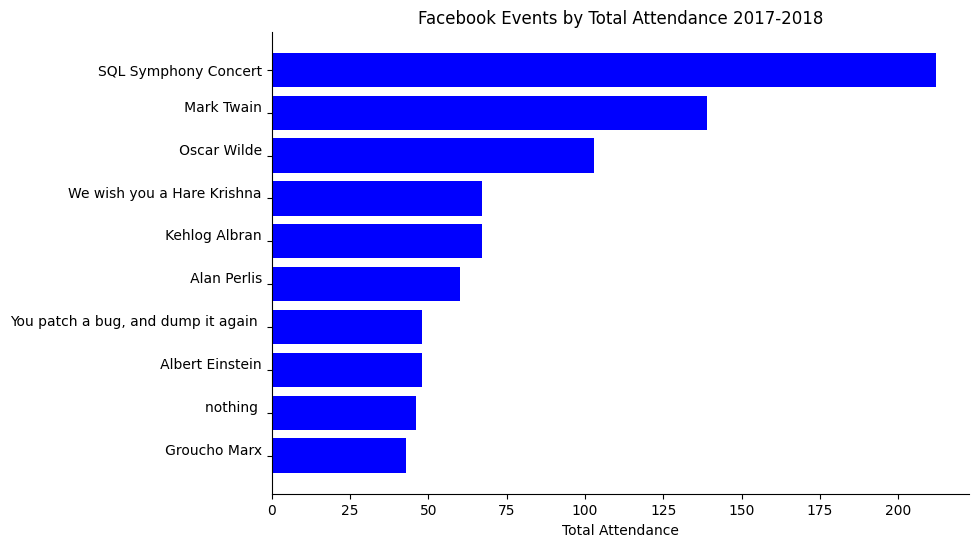

In [184]:
cur.execute("""select count(person_id), event_name from facebook_event_checkin
group by event_name
order by count(person_id) desc""")
rows = cur.fetchall()

df = pd.DataFrame(rows, columns=['count', 'event_name'])
df['event_name'] = df['event_name'].str.replace('-|_|:|\\.', ' ', regex=True)
df = df.iloc[1:11]

plt.figure(figsize=(9, 6))  
plt.barh(df['event_name'], df['count'], color='blue')  
plt.xlabel('Total Attendance')
plt.title('Facebook Events by Total Attendance 2017-2018')
plt.gca().invert_yaxis() 
sns.despine(right = True)
plt.savefig("topevents.png")
plt.show()
